Import libraries and check the version of the libraries.

In [46]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Sklearn: 0.21.3
Matplotlib: 3.1.1
NumPy: 1.17.3


The MNIST dataset can be downloaded from the Keras library.

In [47]:
from keras.datasets import mnist

There are 60,000 training images and 10,000 testing images.

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [49]:
import matplotlib.pyplot as plt

C:\Users\Desiree\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


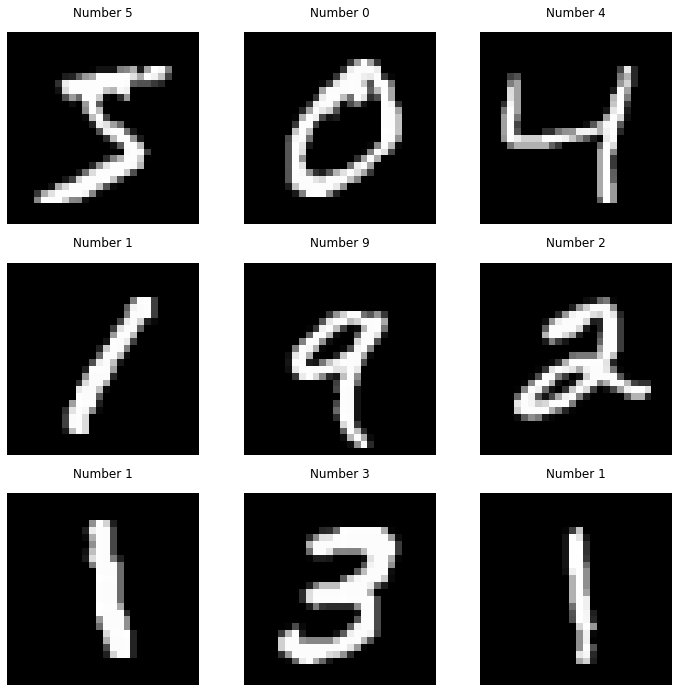

In [50]:
%matplotlib inline 
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate (axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

Preprocess images for clustering. Each image is a 28 by 28 pixel which is changed into a 1-dimensional array.

In [51]:
X = x_train.reshape(len(x_train), -1)
Y = y_train

Check dimensions of the data before and after it was preprocessed.

In [52]:
print(x_train.shape) # images used to be 28 by 28
print(X.shape) # 1-dimensional array

(60000, 28, 28)
(60000, 784)


Print the 1st image before the dataset is scaled to between 0 and 1.

In [53]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Print the 1st image after the dataset is scaled to between 0 and 1.

In [54]:
X = X.astype(float) / 255
print(X[0].shape)
print(X[0]) # data is between 0 and 1

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

Use mini-batch implementation of KMeans clustering.

In [55]:
from sklearn.cluster import MiniBatchKMeans

In [56]:
n_digits = len(np.unique(y_test))
print(n_digits)

np.random.seed(9876)

kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.labels_.shape)
print(kmeans.labels_[:20]) # This shows the cluster numbers but it is not the actual number.

10
[5 9 1 ... 5 3 3]
(60000,)
[5 9 1 8 1 4 6 5 6 0 5 8 7 4 6 0 4 5 3 0]


Define functions to predict which integer corresponds to which cluster.

In [57]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        # find out the most common label that occurs in each cluster
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
            
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
            
        # print(labels)
        # print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels

In [60]:
# This is how np.squeeze works.
# array = np.ones((1,3))
# print(array.shape)
# np.bincount(np.squeeze(array).astype(np.uint8))

In [61]:
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

Use KMeans to predict images. The 1st 20 predictions and 1st 20 actual integers are printed for comparison.

In [62]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 4 2 1 8 1 7 8 1 3 2 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


Use various values of K and evaluate performance of each model with different K values.

In [63]:
from sklearn import metrics

In [64]:
def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # clusters tightly grouped will have lower inertia
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [65]:
clusters = [10, 16, 36]

for n_clusters in clusters:
    np.random.seed(9876)
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator, X, Y)
    
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    print('Accuracy: {}\n'. format(metrics. accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2370354.8961982275
Homogeneity: 0.4556785456060712
Accuracy: 0.5247833333333334

Number of Clusters: 16
Inertia: 2218253.5226204447
Homogeneity: 0.5213618319653279
Accuracy: 0.6129

Number of Clusters: 36
Inertia: 1951819.9616280408
Homogeneity: 0.6929993165095725
Accuracy: 0.7760166666666667



Out of the 3 K values, choose the model that has the highest accuracy.

In [66]:
X_test = x_test.reshape(len(x_test), -1)
X_test = X_test.astype(float) / 255

np.random.seed(9876)
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.7828



Display cluster centroids.

C:\Users\Desiree\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


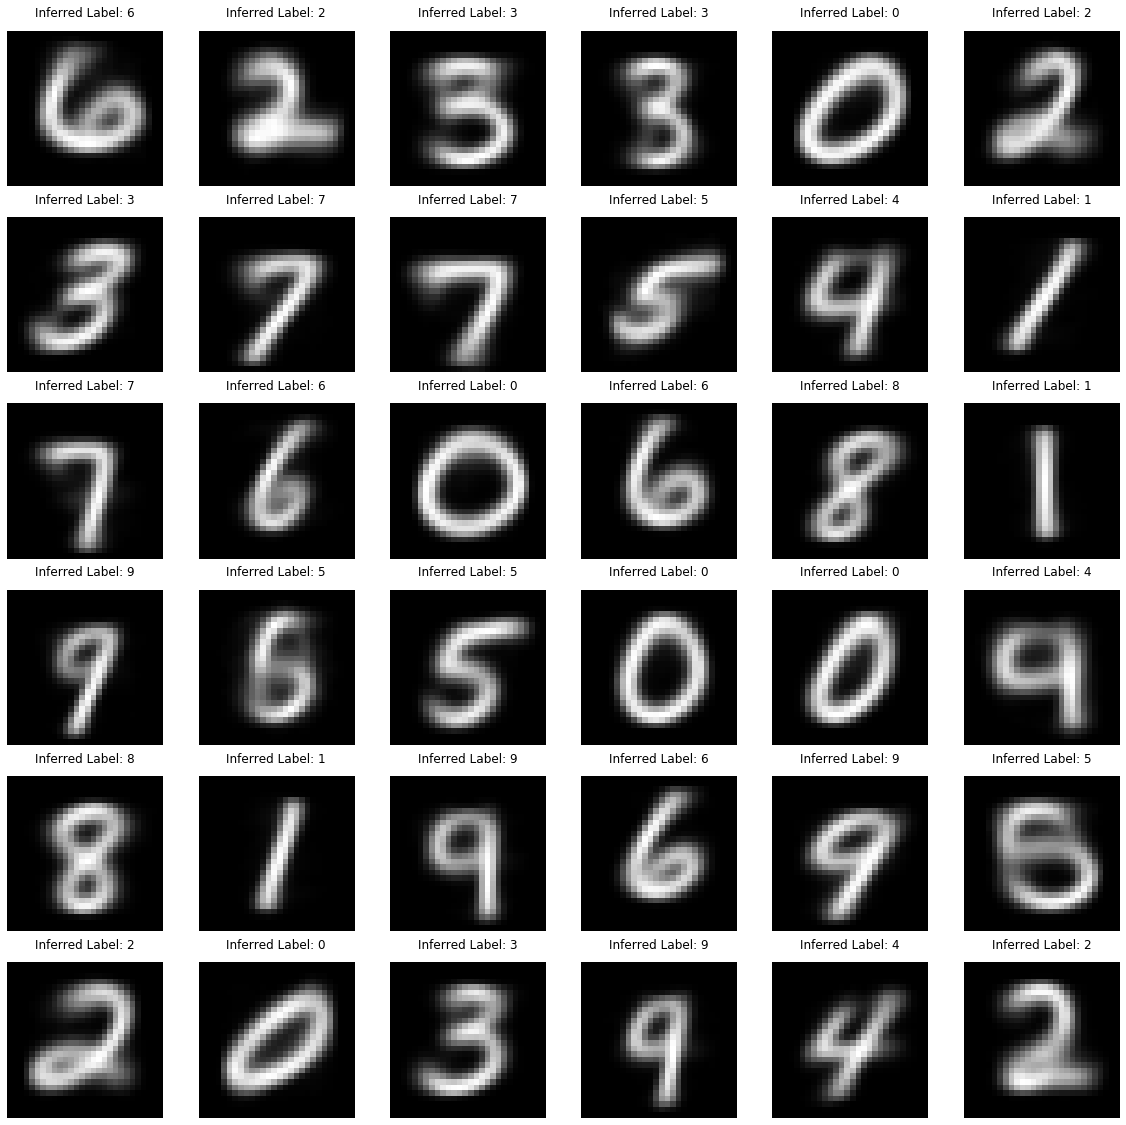

In [67]:
np.random.seed(9876)

kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, Y)

fig, axs = plt.subplots(6,6, figsize=(20,20))
plt.gray()

for i, ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
            
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show() # show the most representative image for each cluster